# Problem Statement




## PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011

### PCA for Female Headed Household Excluding Institutional Household
Link: https://new.census.gov.in/nada/index.php/catalog/7038




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer


In [2]:
# reading data

df = pd.read_excel('PCA India Data Census.xlsx')

In [4]:
df.head().T

,0,1,2,3,4
State Code,1,1,1,1,1
Dist.Code,1,2,3,4,5
State,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir
Area Name,Kupwara,Badgam,Leh(Ladakh),Kargil,Punch
No_HH,7707,6218,4452,1320,11654
TOT_M,23388,19585,6546,2784,20591
TOT_F,29796,23102,10964,4206,29981
M_06,5862,4482,1082,563,5157
F_06,6196,3733,1018,677,4587
M_SC,3,7,3,0,20


In [5]:
dictionary = pd.read_excel('PCA India Data Census.xlsx',sheet_name='dictionary')

In [6]:
df.shape

(640, 61)

In [7]:
df.get_dtype_counts()

int64     59
object     2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
State Code        640 non-null int64
Dist.Code         640 non-null int64
State             640 non-null object
Area Name         640 non-null object
No_HH             640 non-null int64
TOT_M             640 non-null int64
TOT_F             640 non-null int64
M_06              640 non-null int64
F_06              640 non-null int64
M_SC              640 non-null int64
F_SC              640 non-null int64
M_ST              640 non-null int64
F_ST              640 non-null int64
M_LIT             640 non-null int64
F_LIT             640 non-null int64
M_ILL             640 non-null int64
F_ILL             640 non-null int64
TOT_WORK_M        640 non-null int64
TOT_WORK_F        640 non-null int64
MAINWORK_M        640 non-null int64
MAINWORK_F        640 non-null int64
MAIN_CL_M         640 non-null int64
MAIN_CL_F         640 non-null int64
MAIN_AL_M         640 non-null int64
MAIN_

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [11]:
df.State.value_counts()

# UP has most districts followed by MP

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
NCT of Delhi                 9
Manipur                      9
Mizoram                      8
Meghalaya                    7
Puducherry                   4
Tripura                      4
Sikkim                       4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [12]:
df.duplicated().sum()

0

In [13]:
from matplotlib import pyplot as plt

In [14]:
# Which state has highest gender ratio and which has the lowest?

In [15]:
eda= df.copy(deep=True)

In [16]:
eda['GenderRatio'] = eda['TOT_F']/eda['TOT_M']

State             Area Name                  
Andhra Pradesh    Krishna                        2.283250
Odisha            Koraput                        2.268763
Tamil Nadu        Virudhunagar                   2.225429
Andhra Pradesh    West Godavari                  2.221849
Odisha            Baudh                          2.215060
Tamil Nadu        Erode                          2.206783
Odisha            Kalahandi                      2.196023
Himachal Pradesh  Kinnaur                        2.174521
Odisha            Bargarh                        2.164963
Andhra Pradesh    East Godavari                  2.159446
Chhattisgarh      Mahasamund                     2.158424
Tamil Nadu        Namakkal                       2.147890
Odisha            Nuapada                        2.139948
                  Subarnapur                     2.138297
Andhra Pradesh    Guntur                         2.120077
Tamil Nadu        Tiruppur                       2.118926
                  Theni   

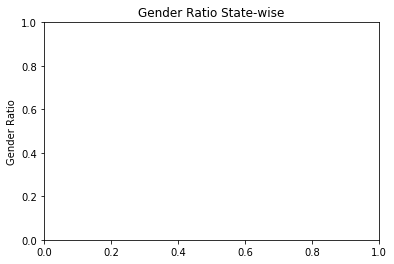

In [17]:
plt.title('Gender Ratio State-wise')
plt.ylabel('Gender Ratio')
eda.groupby(['State','Area Name']).mean()['GenderRatio'].sort_values(ascending=False)#.plot(kind='bar',figsize=(12,7));

In [18]:
# Which state district has the highest gender ratio?

In [19]:
# Which state district has the highest gender ratio?

In [20]:
#!pip install geopandas

In [21]:
import geopandas as gpd

In [22]:
shapes = gpd.read_file('../Downloads/India Map Shape Files/India States/Indian_states.shp')

In [23]:
plot_data = eda.copy(deep=True)

plot_data= plot_data[['State','GenderRatio']]

plot_data1= plot_data.groupby(['State']).mean()['GenderRatio'].reset_index()

plot_data2 = pd.merge(shapes,plot_data1, right_on=plot_data1.State,left_on=shapes.st_nm, how='left')

plot_data2= plot_data2.set_index('st_nm')[['geometry','GenderRatio']].dropna()


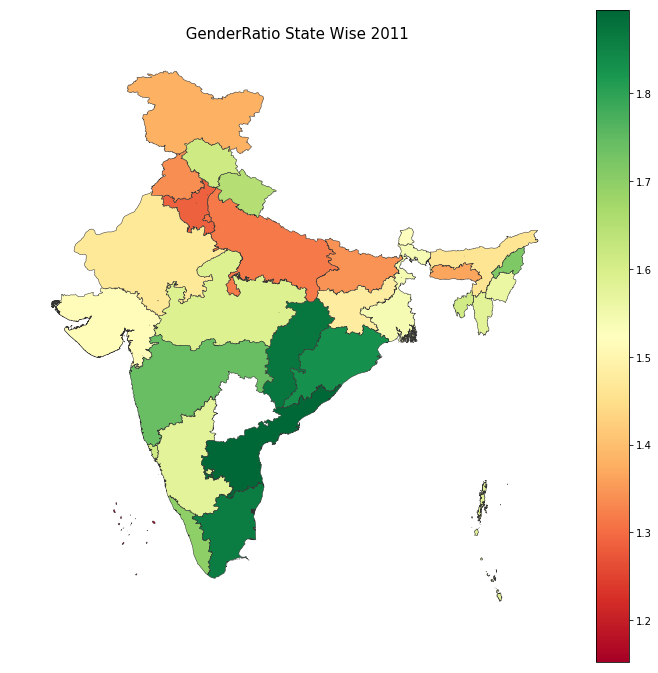

In [24]:
variable ='GenderRatio'
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title(' GenderRatio State Wise 2011',fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = plot_data2.plot(variable,cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
# due to data being old some states not visible and delhi is missing probably because of spelling

#### Literacy

In [25]:
#Female Literacy

eda['f_lit_r'] = eda['F_LIT'] / (eda['M_LIT']+eda['F_LIT'] ) *100

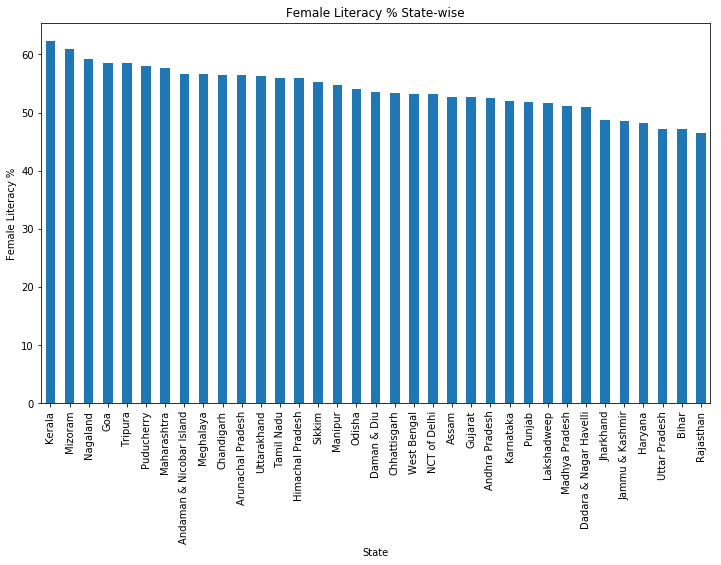

In [26]:
plt.title('Female Literacy % State-wise')
plt.ylabel('Female Literacy %')
eda.groupby(['State']).mean()['f_lit_r'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

In [27]:
eda.groupby(['State']).mean()['f_lit_r'].sort_values(ascending=False)

State
Kerala                      62.289746
Mizoram                     60.972289
Nagaland                    59.259198
Goa                         58.540609
Tripura                     58.438561
Puducherry                  58.049856
Maharashtra                 57.666045
Andaman & Nicobar Island    56.677327
Meghalaya                   56.553030
Chandigarh                  56.420314
Arunachal Pradesh           56.405712
Uttarakhand                 56.225616
Tamil Nadu                  55.957387
Himachal Pradesh            55.935029
Sikkim                      55.230552
Manipur                     54.769138
Odisha                      53.963391
Daman & Diu                 53.542188
Chhattisgarh                53.328443
West Bengal                 53.241942
NCT of Delhi                53.232225
Assam                       52.710446
Gujarat                     52.691377
Andhra Pradesh              52.436647
Karnataka                   52.031827
Punjab                      51.736400
Laksha

In [28]:
import seaborn as sns

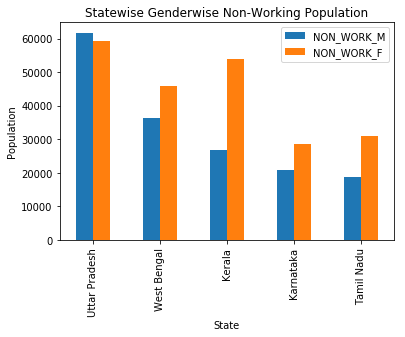

In [29]:
eda.groupby('State').sum()[['NON_WORK_M', 'NON_WORK_F']].sort_values(by=['NON_WORK_M', 'NON_WORK_F'],ascending=False).head(5).plot(kind='bar')
plt.title('Statewise Genderwise Non-Working Population')
plt.ylabel('Population')
plt.show()

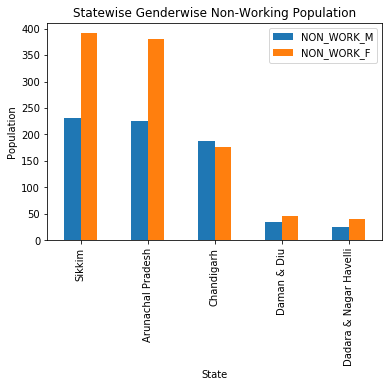

In [30]:
eda.groupby('State').sum()[['NON_WORK_M', 'NON_WORK_F']].sort_values(by=['NON_WORK_M', 'NON_WORK_F'],
                                                                     ascending=False).tail(5).plot(kind='bar')
plt.title('Statewise Genderwise Non-Working Population')
plt.ylabel('Population')
plt.show()

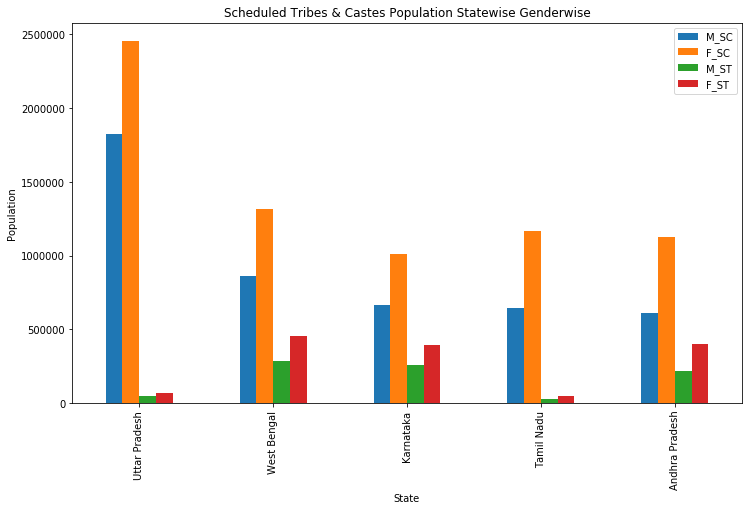

In [31]:
eda.groupby('State').sum()[['M_SC', 'F_SC', 'M_ST','F_ST']].sort_values(
    by=['M_SC', 'F_SC', 'M_ST','F_ST'],ascending=False).head(5).plot(kind='bar',figsize=(12,7))
plt.title('Scheduled Tribes & Castes Population Statewise Genderwise')
plt.ylabel('Population')
plt.show()

In [32]:
len(['TOT_M', 'TOT_F', 'M_SC', 'F_SC', 'M_ST','F_ST', 'M_LIT', 'F_LIT','NON_WORK_M', 'NON_WORK_F'])

10

In [33]:
cols = ['TOT_M', 'TOT_F', 'M_SC', 'F_SC', 'M_ST','F_ST', 'M_LIT', 'F_LIT','NON_WORK_M', 'NON_WORK_F']

In [34]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [19]:
df_num=df.select_dtypes(include=['int64','float64']).iloc[:,2:]
df_num.head(2)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160


In [20]:

df_num.corr()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.000000,0.916170,0.970590,0.797559,0.796373,0.775309,0.823847,0.149627,0.165102,0.931938,...,0.556941,0.555543,0.067425,0.046128,0.368591,0.417447,0.486747,0.536854,0.762384,0.735692
TOT_M,0.916170,1.000000,0.982640,0.950825,0.947792,0.839925,0.826299,0.091421,0.086180,0.989312,...,0.698310,0.595696,0.167405,0.115580,0.495928,0.440360,0.651604,0.588180,0.844896,0.716061
TOT_F,0.970590,0.982640,1.000000,0.907975,0.906557,0.816959,0.832756,0.123626,0.128646,0.985441,...,0.655347,0.598951,0.138763,0.099438,0.451011,0.443132,0.593805,0.571853,0.827653,0.746583
M_06,0.797559,0.950825,0.907975,1.000000,0.998151,0.781120,0.747530,0.055274,0.043948,0.912757,...,0.760610,0.646998,0.266674,0.198338,0.601090,0.514055,0.690601,0.565030,0.784961,0.651143
F_06,0.796373,0.947792,0.906557,0.998151,1.000000,0.773135,0.741686,0.065138,0.054662,0.907641,...,0.763614,0.649834,0.258670,0.189568,0.611568,0.523270,0.698636,0.574178,0.783727,0.651439
M_SC,0.775309,0.839925,0.816959,0.781120,0.773135,1.000000,0.985071,-0.045666,-0.047825,0.818484,...,0.673633,0.569579,0.184332,0.129750,0.523450,0.461898,0.664918,0.591437,0.735399,0.580020
F_SC,0.823847,0.826299,0.832756,0.747530,0.741686,0.985071,1.000000,-0.014122,-0.009190,0.814150,...,0.650455,0.585690,0.163427,0.116228,0.508006,0.488657,0.628470,0.589346,0.720099,0.600089
M_ST,0.149627,0.091421,0.123626,0.055274,0.065138,-0.045666,-0.014122,1.000000,0.988047,0.090541,...,0.122967,0.196571,0.027219,0.007077,0.126336,0.238813,-0.005482,0.090123,0.122986,0.146954
F_ST,0.165102,0.086180,0.128646,0.043948,0.054662,-0.047825,-0.009190,0.988047,1.000000,0.087375,...,0.121411,0.216741,0.017205,0.002556,0.136396,0.273307,-0.005880,0.099984,0.114131,0.150869
M_LIT,0.931938,0.989312,0.985441,0.912757,0.907641,0.818484,0.814150,0.090541,0.087375,1.000000,...,0.652507,0.560065,0.144067,0.101355,0.421762,0.381727,0.600120,0.552371,0.852199,0.738672


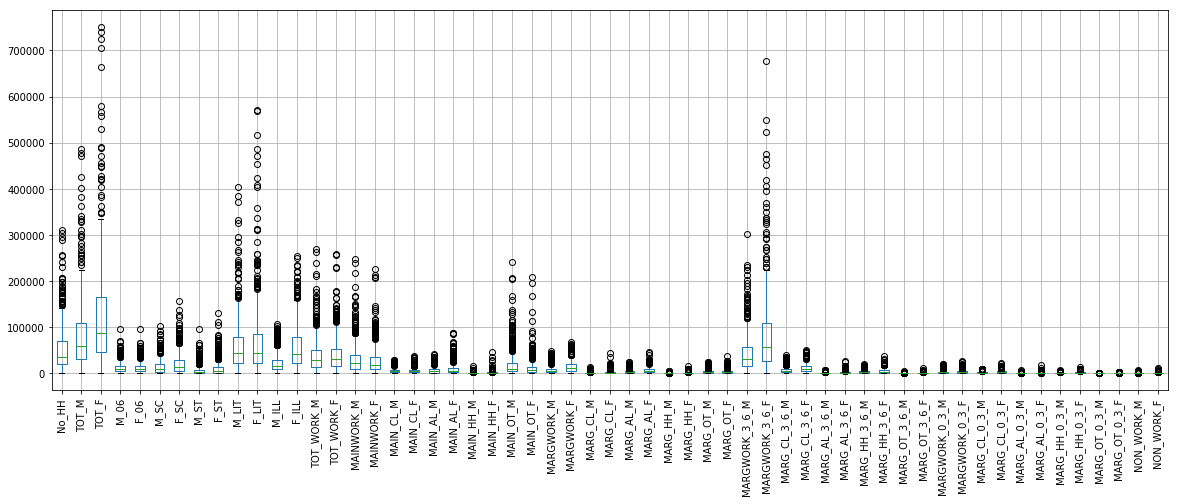

In [21]:
df_num.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

In [22]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [23]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
No_HH             640 non-null float64
TOT_M             640 non-null float64
TOT_F             640 non-null float64
M_06              640 non-null float64
F_06              640 non-null float64
M_SC              640 non-null float64
F_SC              640 non-null float64
M_ST              640 non-null float64
F_ST              640 non-null float64
M_LIT             640 non-null float64
F_LIT             640 non-null float64
M_ILL             640 non-null float64
F_ILL             640 non-null float64
TOT_WORK_M        640 non-null float64
TOT_WORK_F        640 non-null float64
MAINWORK_M        640 non-null float64
MAINWORK_F        640 non-null float64
MAIN_CL_M         640 non-null float64
MAIN_CL_F         640 non-null float64
MAIN_AL_M         640 non-null float64
MAIN_AL_F         640 non-null float64
MAIN_HH_M         640 non-null float64
MAIN_HH_F         640 non-null float6

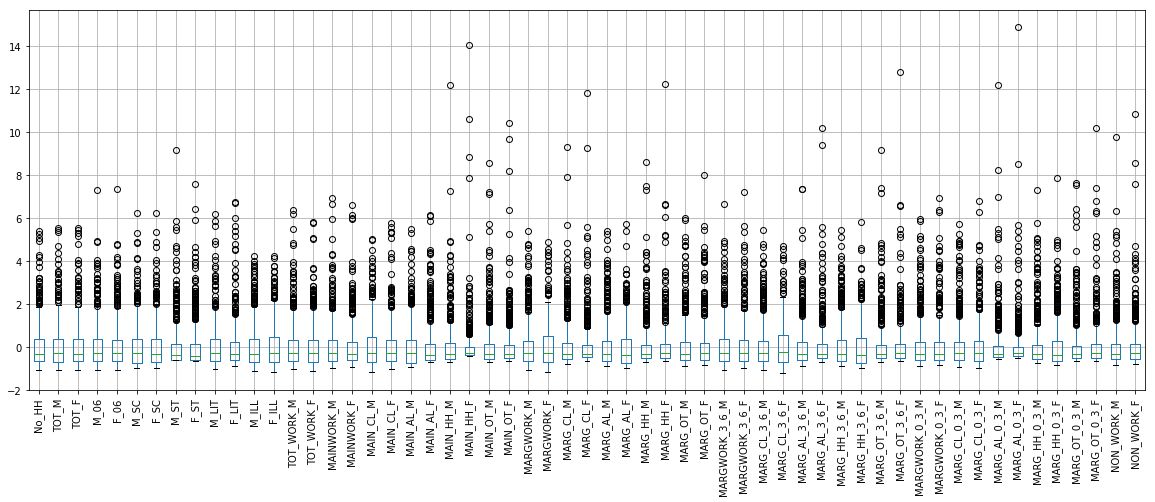

In [24]:
df_num_scaled.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

In [25]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


## Bartletts Test of Sphericity
#### Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

> $H_O$: All variables in the data are uncorrelated

> $H_A$: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

In [26]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

C:\Users\Vimesh\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:111: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

## KMO Test
#### The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

>Generally, if MSA is less than *0.5*, PCA is not recommended, since no reduction is expected. On the other hand, *MSA > 0.7* is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [27]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

C:\Users\Vimesh\Anaconda3\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.8034956686157672

## Step 1- Create the covariance Matrix


In [28]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

pd.set_option('display.expand_frame_repr', True)
pd.get_option("display.max_rows")
np.set_printoptions(threshold=np.inf)


In [29]:
from sklearn.decomposition import PCA 
pca = PCA(random_state=123)
df_pca = pca.fit_transform(df_num_scaled)

In [30]:
pd.DataFrame(np.round(pca.get_covariance(),2),columns=df_num_scaled.columns,index=df_num_scaled.columns) #cov matrix

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,0.93,0.76,0.86,0.94,0.93,0.93,0.89,0.43,0.38,0.67,0.59,0.64,0.49,0.85,0.82,0.68,0.70,0.17,0.08,0.44,0.49,0.50,0.54,0.80,0.83,0.85,0.92,0.69,0.72,0.21,0.09,0.45,0.50,0.50,0.53,0.80,0.83,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,0.93,0.91,0.89,0.97,0.81,0.93,0.75,0.53,0.36,0.59,0.38,0.74,0.44,0.85,0.75,0.81,0.70,0.30,0.15,0.54,0.45,0.67,0.58,0.89,0.84,0.98,0.98,0.82,0.72,0.35,0.17,0.55,0.44,0.67,0.57,0.89,0.84,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,0.96,0.86,0.89,0.97,0.88,0.94,0.82,0.49,0.39,0.62,0.47,0.70,0.47,0.86,0.80,0.77,0.72,0.26,0.14,0.50,0.48,0.61,0.57,0.87,0.86,0.94,0.98,0.78,0.74,0.31,0.15,0.51,0.47,0.60,0.56,0.87,0.86,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,0.83,0.95,0.86,0.86,0.68,0.79,0.59,0.56,0.38,0.55,0.30,0.66,0.36,0.69,0.56,0.85,0.72,0.42,0.24,0.64,0.49,0.70,0.54,0.84,0.75,0.99,0.94,0.86,0.72,0.47,0.25,0.64,0.47,0.69,0.53,0.84,0.74,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,0.83,0.95,0.87,0.85,0.69,0.79,0.59,0.56,0.38,0.56,0.30,0.66,0.36,0.68,0.56,0.86,0.72,0.42,0.23,0.65,0.50,0.70,0.55,0.84,0.75,0.99,0.94,0.87,0.72,0.48,0.25,0.65,0.48,0.70,0.54,0.84,0.74,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,0.72,0.80,0.83,0.83,0.71,0.78,0.65,0.61,0.36,0.63,0.41,0.71,0.39,0.64,0.58,0.75,0.66,0.30,0.15,0.56,0.46,0.67,0.57,0.75,0.69,0.81,0.80,0.75,0.66,0.34,0.16,0.57,0.45,0.66,0.56,0.74,0.69,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,0.73,0.76,0.85,0.82,0.78,0.78,0.71,0.58,0.39,0.67,0.51,0.68,0.42,0.64,0.60,0.73,0.68,0.28,0.14,0.55,0.51,0.63,0.57,0.73,0.70,0.79,0.79,0.73,0.70,0.32,0.15,0.56,0.51,0.63,0.55,0.72,0.70,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,0.10,0.08,0.14,0.12,0.27,0.11,0.23,0.10,0.19,0.14,0.20,-0.03,0.03,0.09,0.17,0.12,0.27,0.09,0.06,0.14,0.31,-0.01,0.09,0.07,0.12,0.06,0.05,0.12,0.28,0.12,0.08,0.14,0.32,-0.02,0.09,0.06,0.11,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,0.10,0.07,0.15,0.12,0.29,0.11,0.25,0.08,0.20,0.15,0.23,-0.03,0.04,0.08,0.17,0.12,0.29,0.08,0.06,0.15,0.35,-0.02,0.10,0.06,0.12,0.05,0.05,0.12,0.31,0.11,0.08,0.15,0.37,-0.02,0.10,0.05,0.11,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,0.97,0.84,0.84,0.98,0.82,0.95,0.77,0.47,0.33,0.54,0.37,0.73,0.45,0.90,0.80,0.75,0.66,0.26,0.13,0.46,0.39,0.62,0.55,0.90,0.86,0.95,0.99,0.76,0.68,0.30,0.14,0.46,0.38,0.61,0.54,0.89,0.86,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


## Step 2- Get eigen values and eigen vector


In [31]:
eigenvec=pca.components_
print('Eigenvectors:',np.round(eigenvec,2))

Eigenvectors: [[ 0.16  0.17  0.17  0.16  0.16  0.15  0.15  0.03  0.03  0.16  0.15  0.16
   0.17  0.16  0.15  0.15  0.12  0.1   0.07  0.11  0.07  0.13  0.08  0.12
   0.11  0.16  0.16  0.08  0.05  0.13  0.11  0.14  0.13  0.16  0.15  0.16
   0.16  0.17  0.16  0.09  0.05  0.13  0.11  0.14  0.12  0.15  0.15  0.15
   0.14  0.05  0.04  0.12  0.12  0.14  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  -0.02 -0.02 -0.05 -0.05  0.03  0.03 -0.12 -0.15 -0.01
  -0.01 -0.13 -0.09 -0.18 -0.15  0.06  0.09 -0.03 -0.06 -0.08 -0.08 -0.21
  -0.21  0.09  0.13  0.27  0.25  0.17  0.14  0.07  0.02 -0.09 -0.12 -0.04
  -0.11  0.08  0.1   0.26  0.24  0.16  0.13  0.06  0.01 -0.09 -0.13  0.15
   0.18  0.25  0.24  0.19  0.18  0.08  0.05 -0.07 -0.07]
 [-0.    0.06  0.04  0.06  0.05  0.   -0.03 -0.12 -0.14  0.08  0.12 -0.02
  -0.09  0.05 -0.06  0.05 -0.06 -0.07 -0.01 -0.25 -0.25  0.03 -0.06  0.14
   0.1  -0.01 -0.05  0.2   0.27 -0.19 -0.27 -0.02 -0.08  0.11  0.1   0.06
   0.08 -0.02 -0.07  0.15  0.26 -0.2  -0.28 -0.02 -0.08  0

In [32]:
eigenvalues=pca.explained_variance_
print('Eigenvalues:',np.round(eigenvalues,2))

Eigenvalues: [3.181e+01 7.870e+00 4.150e+00 3.670e+00 2.210e+00 1.940e+00 1.180e+00
 7.500e-01 6.200e-01 5.300e-01 4.300e-01 3.500e-01 3.000e-01 2.800e-01
 1.900e-01 1.400e-01 1.100e-01 1.100e-01 1.000e-01 8.000e-02 6.000e-02
 4.000e-02 4.000e-02 3.000e-02 3.000e-02 2.000e-02 1.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]


In [33]:
var_exp=np.round(pca.explained_variance_ratio_,2)*100

In [34]:
var_exp

array([56., 14.,  7.,  6.,  4.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

## Step 3 View Scree Plot to identify the number of components to be built


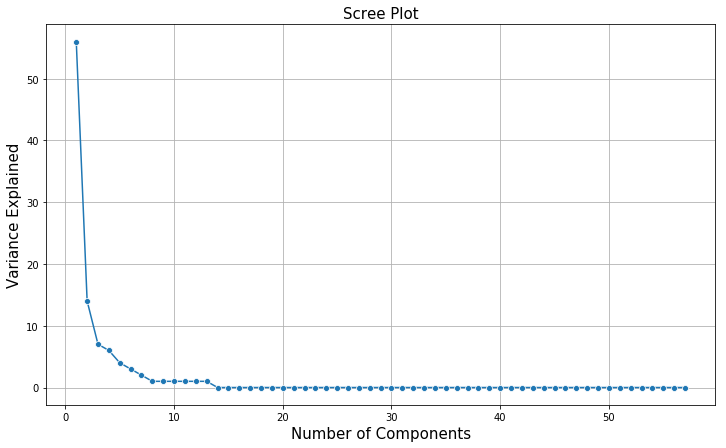

In [35]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [36]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

from sklearn.decomposition import PCA
pca = PCA(n_components=6,random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() # Component output

array([[-4.61726348e+00, -4.77166187e+00, -5.96483558e+00,
        -6.28079629e+00, -4.47856622e+00, -3.31996343e+00,
        -5.02139317e+00, -4.60870926e+00, -5.18670311e+00,
        -4.22619010e+00, -5.78001693e+00, -5.35942744e+00,
        -6.11923869e+00, -3.91196651e+00, -5.76828055e+00,
        -5.34613097e+00, -6.03146896e+00, -5.96962170e+00,
        -4.46224144e+00, -5.65016490e+00, -1.05266642e+00,
        -5.59000483e+00, -1.27680358e+00,  1.03424020e+01,
        -6.45335360e+00, -3.98360010e+00,  3.69769823e+00,
        -4.91716205e-01, -2.81046966e+00, -2.72555820e+00,
        -3.32866777e+00, -3.86224557e+00, -2.08348548e+00,
        -6.15835849e+00,  2.59503492e+00, -3.42870301e+00,
         2.34847703e+00,  1.02618609e+00, -3.72110853e+00,
        -4.97585558e+00,  4.54072146e+00, -3.08562050e+00,
        -8.18860964e-02, -3.65537457e+00, -4.75102941e+00,
        -2.27762291e+00, -3.75363062e+00, -9.64322727e-01,
         2.49973239e+00, -1.18726792e+00, -3.75506418e+0

In [44]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled),index=['PC0','PC1','PC2','PC3','PC4','PC5'])
df_pca_loading.shape

(6, 57)

In [45]:
df_pca_loading = np.round(df_pca_loading,2)

In [47]:

df_pca_loading.style.highlight_max(color = 'lightgreen', axis = 0)


    

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
PC0,0.16,0.17,0.17,0.16,0.16,0.15,0.15,0.03,0.03,0.16,0.15,0.16,0.17,0.16,0.15,0.15,0.12,0.1,0.07,0.11,0.07,0.13,0.08,0.12,0.11,0.16,0.16,0.08,0.05,0.13,0.11,0.14,0.13,0.16,0.15,0.16,0.16,0.17,0.16,0.09,0.05,0.13,0.11,0.14,0.12,0.15,0.15,0.15,0.14,0.05,0.04,0.12,0.12,0.14,0.13,0.15,0.13
PC1,-0.13,-0.09,-0.1,-0.02,-0.02,-0.05,-0.05,0.03,0.03,-0.12,-0.15,-0.01,-0.01,-0.13,-0.09,-0.18,-0.15,0.06,0.09,-0.03,-0.06,-0.08,-0.08,-0.21,-0.21,0.09,0.13,0.27,0.25,0.17,0.14,0.07,0.02,-0.09,-0.12,-0.04,-0.11,0.08,0.1,0.26,0.24,0.16,0.13,0.06,0.01,-0.09,-0.13,0.15,0.18,0.25,0.24,0.19,0.18,0.08,0.05,-0.07,-0.07
PC2,-0,0.06,0.04,0.06,0.05,0,-0.03,-0.12,-0.14,0.08,0.12,-0.02,-0.09,0.05,-0.06,0.05,-0.06,-0.07,-0.01,-0.25,-0.25,0.03,-0.06,0.14,0.1,-0.01,-0.05,0.2,0.27,-0.19,-0.27,-0.02,-0.08,0.11,0.1,0.06,0.08,-0.02,-0.07,0.15,0.26,-0.2,-0.28,-0.02,-0.08,0.11,0.1,0.05,0.02,0.27,0.28,-0.14,-0.2,-0.02,-0.08,0.11,0.1
PC3,-0.13,-0.02,-0.07,0.01,0.01,0.01,-0.03,-0.22,-0.23,-0.04,-0.06,0.03,-0.08,-0.04,-0.23,-0.07,-0.25,-0.09,-0.29,-0.14,-0.29,0.15,0.05,-0.04,-0.12,0.09,-0.09,-0.06,-0.17,0.09,-0.11,0.24,0.2,0.09,0.03,-0,0,0.09,-0.11,-0.04,-0.18,0.08,-0.14,0.24,0.19,0.09,0.03,0.09,-0.02,-0.1,-0.14,0.13,0,0.23,0.21,0.08,0.02
PC4,-0.01,-0.03,-0.01,-0.05,-0.04,-0.17,-0.16,0.43,0.44,-0.01,0.06,-0.1,-0.12,-0.02,-0.04,-0.04,-0.08,-0.29,-0.24,-0.21,-0.18,-0.13,-0.14,0.06,0.08,0.06,0.09,-0.02,-0.06,0.02,0.08,-0.06,-0.03,0.12,0.17,-0.04,0,0.05,0.07,-0.01,-0.06,0.01,0.06,-0.07,-0.04,0.11,0.14,0.08,0.13,-0.05,-0.05,0.06,0.13,-0.04,0,0.16,0.24
PC5,0,-0.07,-0.04,-0.16,-0.15,-0.06,-0.04,0.22,0.23,-0.06,-0.05,-0.12,-0.03,-0,0.11,0.02,0.12,-0.01,0.1,-0.03,0.02,0.17,0.42,0.02,0.08,-0.09,0.02,0.03,0.09,-0.14,-0.09,0.09,0.37,-0.06,0,-0.14,-0.11,-0.1,0.02,0.01,0.09,-0.14,-0.08,0.1,0.38,-0.06,0.01,-0.06,-0,0.07,0.08,-0.12,-0.11,0.06,0.3,-0.05,-0.02


In [60]:
# linear equation of first PC

In [61]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',df_num_scaled.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0